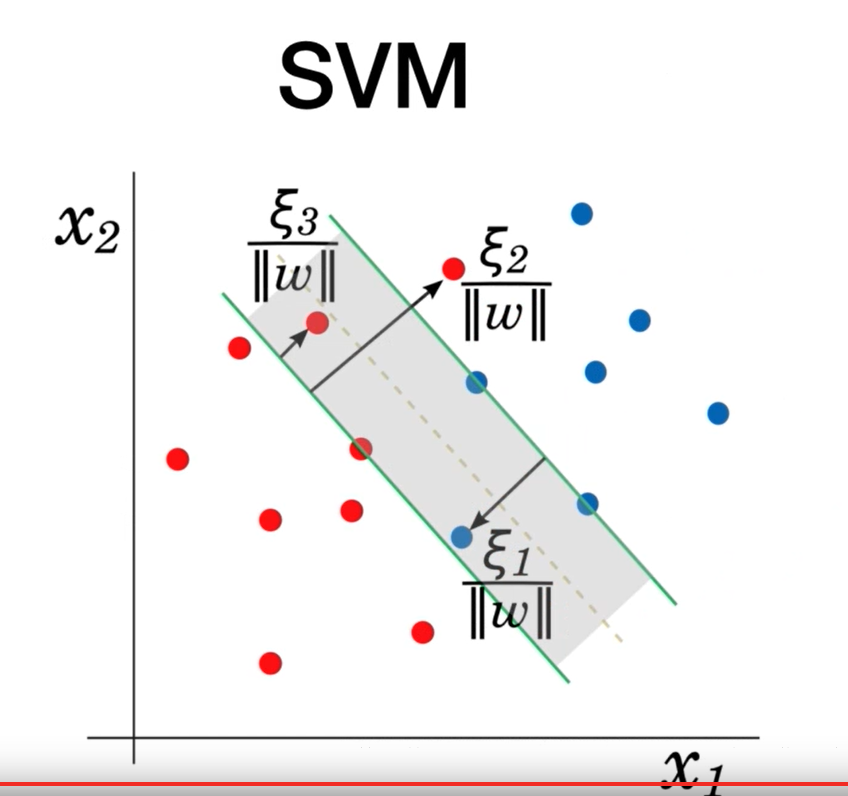

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict, train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
import math
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.covariance import EmpiricalCovariance
from sklearn.metrics import f1_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.datasets import make_circles
from sklearn import preprocessing
import warnings


warnings.filterwarnings('ignore')

In [2]:
data = pd.read_pickle("veriler.pkl")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ulke      22 non-null     object
 1   boy       22 non-null     int64 
 2   kilo      22 non-null     int64 
 3   yas       22 non-null     int64 
 4   cinsiyet  22 non-null     object
dtypes: int64(3), object(2)
memory usage: 1008.0+ bytes


In [3]:
categorical_columns = data.select_dtypes(exclude = 'object').columns.to_list()
#print(categorical_columns)

# categorical olmayan columnların hepsini float32 dtype yapalım

data[categorical_columns] = data[categorical_columns].astype('float32')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ulke      22 non-null     object 
 1   boy       22 non-null     float32
 2   kilo      22 non-null     float32
 3   yas       22 non-null     float32
 4   cinsiyet  22 non-null     object 
dtypes: float32(3), object(2)
memory usage: 744.0+ bytes


In [4]:
x = data.iloc[:,1:4].values
y = data.iloc[:,4:].values

X_train, X_test,y_train,y_test = train_test_split(x,y,test_size=0.33, random_state=0)



### Modeli normalize edip devam edelim

In [5]:
categorical = categorical_columns

columns_to_normalize = [col for col in data.columns if col not in categorical]
columns_to_normalize = ['boy','kilo','yas']
df = data[columns_to_normalize]
data[columns_to_normalize] = MinMaxScaler().fit_transform(df)

data

,ulke,boy,kilo,yas,cinsiyet
0,tr,0.073529,0.000000,0.021739,e
1,tr,0.000000,0.080000,0.043478,e
2,tr,0.147059,0.053333,0.021739,k
3,tr,0.117647,0.000000,0.000000,k
4,tr,0.058824,0.106667,0.065217,e
5,tr,0.808823,0.800000,0.456522,e
6,tr,0.955882,0.666667,0.347826,e
7,tr,0.735294,0.800000,0.565217,e
8,tr,0.764706,0.400000,0.282609,k
9,us,0.882353,1.000000,0.521739,e


### öncelikle linear bir support vector classifier yapalım, daha sonra poly, rbf ve  sigmoid modellerini de deneriz

In [6]:
svm_linear = SVC(kernel='linear', probability=True ,random_state=42)
svm_linear.fit(X_train,y_train)

y_pred = svm_linear.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)

print(conf_matrix)
print(classification_report(y_test, y_pred))

[[1 0]
 [2 5]]
              precision    recall  f1-score   support

           e       0.33      1.00      0.50         1
           k       1.00      0.71      0.83         7

    accuracy                           0.75         8
   macro avg       0.67      0.86      0.67         8
weighted avg       0.92      0.75      0.79         8



In [7]:
TP = conf_matrix[0,0]
TN = conf_matrix[1,1]
FP = conf_matrix[0,1]
FN = conf_matrix[1,0]

# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

print('Training set score: {:.4f}'.format(svm_linear.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(svm_linear.score(X_test, y_test)))

Classification accuracy : 0.7500
Training set score: 0.8571
Test set score: 0.7500


<Axes: >

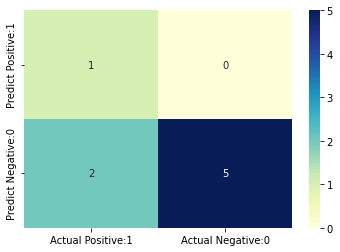

In [8]:
plt.figure(figsize=(6,4))

conf_matrix_matrix = pd.DataFrame(data=conf_matrix, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(conf_matrix_matrix, annot=True, fmt='d', cmap='YlGnBu')

#### Applying 5-Fold Cross Validation

In [9]:
scores = cross_val_score(svm_linear, X_train, y_train, cv = 5, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[1.         0.66666667 1.         0.66666667 0.        ]


### future prediction yapalım

In [10]:
input_data = np.array([181.0, 73.0, 22.0]).reshape(1, -1)
print(svm_linear.predict(input_data))

['e']


In [11]:
#encoded_cols = pd.get_dummies(data['cinsiyet'], dtype=np.float32)
#data = pd.concat([data, encoded_cols], axis=1)
#data.drop('cinsiyet', axis=1, inplace=True)

In [12]:
data

,ulke,boy,kilo,yas,cinsiyet
0,tr,0.073529,0.000000,0.021739,e
1,tr,0.000000,0.080000,0.043478,e
2,tr,0.147059,0.053333,0.021739,k
3,tr,0.117647,0.000000,0.000000,k
4,tr,0.058824,0.106667,0.065217,e
5,tr,0.808823,0.800000,0.456522,e
6,tr,0.955882,0.666667,0.347826,e
7,tr,0.735294,0.800000,0.565217,e
8,tr,0.764706,0.400000,0.282609,k
9,us,0.882353,1.000000,0.521739,e


### ROC - AUC çizelim

AUC Score: 0.8571428571428571


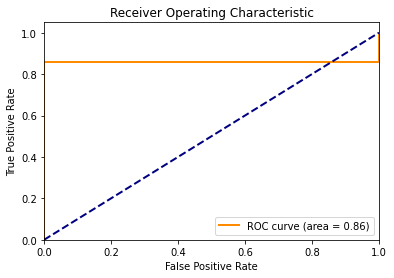

In [13]:
label_encoder = LabelEncoder()
y_true_encoded = label_encoder.fit_transform(y_test)

# Sınıf olasılıklarını alın
y_scores = svm_linear.predict_proba(X_test)[:, 1]

# ROC eğrisini hesapla
fpr, tpr, _ = roc_curve(y_true_encoded, y_scores)
roc_auc = auc(fpr, tpr)

# AUC değerini ekrana yazdır
print('AUC Score:', roc_auc)

# AUC eğrisini çizdir
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### farklı svm kernelları ile de kullanımlarını gerçekleştirelim. poly için inceleme:

In [14]:
data = pd.read_pickle("veriler.pkl")

categorical_columns = data.select_dtypes(exclude = 'object').columns.to_list()
#print(categorical_columns)

# categorical olmayan columnların hepsini float32 dtype yapalım

data[categorical_columns] = data[categorical_columns].astype('float32')

x = data.iloc[:,1:4].values
y = data.iloc[:,4:].values

X_train, X_test,y_train,y_test = train_test_split(x,y,test_size=0.33, random_state=0)

categorical = categorical_columns

columns_to_normalize = [col for col in data.columns if col not in categorical]
columns_to_normalize = ['boy','kilo','yas']
df = data[columns_to_normalize]
data[columns_to_normalize] = MinMaxScaler().fit_transform(df)

[[0 1]
 [5 2]]
              precision    recall  f1-score   support

           e       0.00      0.00      0.00         1
           k       0.67      0.29      0.40         7

    accuracy                           0.25         8
   macro avg       0.33      0.14      0.20         8
weighted avg       0.58      0.25      0.35         8

Classification accuracy : 0.2500
Training set score: 0.8571
Test set score: 0.7500
Cross-validation scores:[1.         0.66666667 1.         0.66666667 0.        ]
['e']


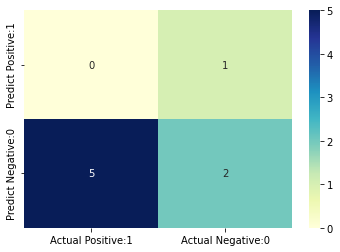

In [15]:
svm_poly = SVC(kernel='poly', probability=True ,random_state=42)
svm_poly.fit(X_train,y_train)

y_pred = svm_poly.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)

print(conf_matrix)
print(classification_report(y_test, y_pred))

TP = conf_matrix[0,0]
TN = conf_matrix[1,1]
FP = conf_matrix[0,1]
FN = conf_matrix[1,0]

# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

print('Training set score: {:.4f}'.format(svm_linear.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(svm_linear.score(X_test, y_test)))

plt.figure(figsize=(6,4))

conf_matrix_matrix = pd.DataFrame(data=conf_matrix, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(conf_matrix_matrix, annot=True, fmt='d', cmap='YlGnBu')

#### Applying 5-Fold Cross Validation
scores = cross_val_score(svm_linear, X_train, y_train, cv = 5, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

### future prediction yapalım
input_data = np.array([181.0, 73.0, 22.0]).reshape(1, -1)
print(svm_linear.predict(input_data))

AUC Score: 0.0


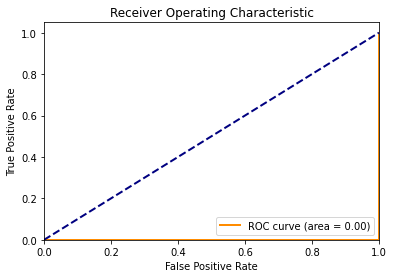

In [16]:
label_encoder = LabelEncoder()
y_true_encoded = label_encoder.fit_transform(y_test)

# Sınıf olasılıklarını alın
y_scores = svm_poly.predict_proba(X_test)[:, 1]

# ROC eğrisini hesapla
fpr, tpr, _ = roc_curve(y_true_encoded, y_scores)
roc_auc = auc(fpr, tpr)

# AUC değerini ekrana yazdır
print('AUC Score:', roc_auc)

# AUC eğrisini çizdir
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### rbf kerneli ile deneme:

In [17]:
data = pd.read_pickle("veriler.pkl")

categorical_columns = data.select_dtypes(exclude = 'object').columns.to_list()
#print(categorical_columns)

# categorical olmayan columnların hepsini float32 dtype yapalım

data[categorical_columns] = data[categorical_columns].astype('float32')

x = data.iloc[:,1:4].values
y = data.iloc[:,4:].values

X_train, X_test,y_train,y_test = train_test_split(x,y,test_size=0.33, random_state=0)

categorical = categorical_columns

columns_to_normalize = [col for col in data.columns if col not in categorical]
columns_to_normalize = ['boy','kilo','yas']
df = data[columns_to_normalize]
data[columns_to_normalize] = MinMaxScaler().fit_transform(df)

[[1 0]
 [7 0]]
              precision    recall  f1-score   support

           e       0.12      1.00      0.22         1
           k       0.00      0.00      0.00         7

    accuracy                           0.12         8
   macro avg       0.06      0.50      0.11         8
weighted avg       0.02      0.12      0.03         8

Classification accuracy : 0.1250
Training set score: 0.8571
Test set score: 0.7500
Cross-validation scores:[1.         0.66666667 1.         0.66666667 0.        ]
['e']


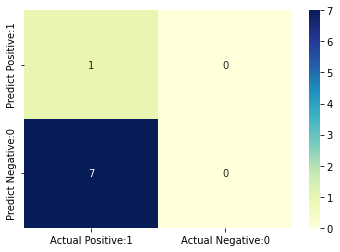

In [18]:
svm_rbf = SVC(kernel='rbf', probability=True ,random_state=42)
svm_rbf.fit(X_train,y_train)

y_pred = svm_rbf.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)

print(conf_matrix)
print(classification_report(y_test, y_pred))

TP = conf_matrix[0,0]
TN = conf_matrix[1,1]
FP = conf_matrix[0,1]
FN = conf_matrix[1,0]

# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

print('Training set score: {:.4f}'.format(svm_linear.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(svm_linear.score(X_test, y_test)))

plt.figure(figsize=(6,4))

conf_matrix_matrix = pd.DataFrame(data=conf_matrix, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(conf_matrix_matrix, annot=True, fmt='d', cmap='YlGnBu')

#### Applying 5-Fold Cross Validation
scores = cross_val_score(svm_linear, X_train, y_train, cv = 5, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

### future prediction yapalım
input_data = np.array([181.0, 73.0, 22.0]).reshape(1, -1)
print(svm_linear.predict(input_data))

AUC Score: 1.0


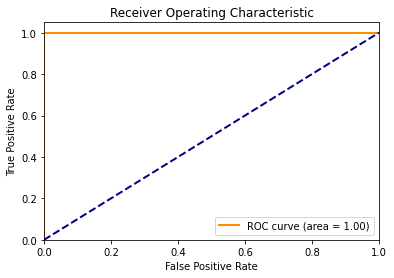

In [19]:
label_encoder = LabelEncoder()
y_true_encoded = label_encoder.fit_transform(y_test)

# Sınıf olasılıklarını alın
y_scores = svm_rbf.predict_proba(X_test)[:, 1]

# ROC eğrisini hesapla
fpr, tpr, _ = roc_curve(y_true_encoded, y_scores)
roc_auc = auc(fpr, tpr)

# AUC değerini ekrana yazdır
print('AUC Score:', roc_auc)

# AUC eğrisini çizdir
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### sigmoid kerneli ile deneme:

In [20]:
data = pd.read_pickle("veriler.pkl")

categorical_columns = data.select_dtypes(exclude = 'object').columns.to_list()
#print(categorical_columns)

# categorical olmayan columnların hepsini float32 dtype yapalım

data[categorical_columns] = data[categorical_columns].astype('float32')

x = data.iloc[:,1:4].values
y = data.iloc[:,4:].values

X_train, X_test,y_train,y_test = train_test_split(x,y,test_size=0.33, random_state=0)

categorical = categorical_columns

columns_to_normalize = [col for col in data.columns if col not in categorical]
columns_to_normalize = ['boy','kilo','yas']
df = data[columns_to_normalize]
data[columns_to_normalize] = MinMaxScaler().fit_transform(df)

[[1 0]
 [7 0]]
              precision    recall  f1-score   support

           e       0.12      1.00      0.22         1
           k       0.00      0.00      0.00         7

    accuracy                           0.12         8
   macro avg       0.06      0.50      0.11         8
weighted avg       0.02      0.12      0.03         8

Classification accuracy : 0.1250
Training set score: 0.8571
Test set score: 0.7500
Cross-validation scores:[1.         0.66666667 1.         0.66666667 0.        ]
['e']


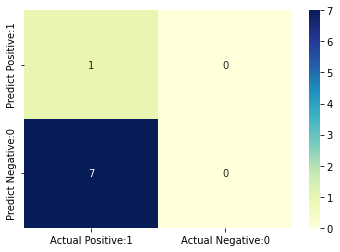

In [21]:
svm_sigmoid = SVC(kernel='sigmoid', probability=True ,random_state=42)
svm_sigmoid.fit(X_train,y_train)

y_pred = svm_sigmoid.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)

print(conf_matrix)
print(classification_report(y_test, y_pred))

TP = conf_matrix[0,0]
TN = conf_matrix[1,1]
FP = conf_matrix[0,1]
FN = conf_matrix[1,0]

# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

print('Training set score: {:.4f}'.format(svm_linear.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(svm_linear.score(X_test, y_test)))

plt.figure(figsize=(6,4))

conf_matrix_matrix = pd.DataFrame(data=conf_matrix, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(conf_matrix_matrix, annot=True, fmt='d', cmap='YlGnBu')

#### Applying 5-Fold Cross Validation
scores = cross_val_score(svm_linear, X_train, y_train, cv = 5, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

### future prediction yapalım
input_data = np.array([181.0, 73.0, 22.0]).reshape(1, -1)
print(svm_linear.predict(input_data))

AUC Score: 0.0


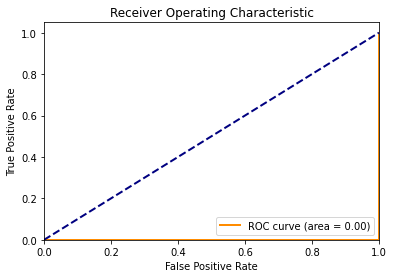

In [22]:
label_encoder = LabelEncoder()
y_true_encoded = label_encoder.fit_transform(y_test)

# Sınıf olasılıklarını alın
y_scores = svm_sigmoid.predict_proba(X_test)[:, 1]

# ROC eğrisini hesapla
fpr, tpr, _ = roc_curve(y_true_encoded, y_scores)
roc_auc = auc(fpr, tpr)

# AUC değerini ekrana yazdır
print('AUC Score:', roc_auc)

# AUC eğrisini çizdir
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### SVM Kernel Trick ile boyut arttırılarak daha düzgün classification işlemleri gerçekleştirilebilir. Asıl önemli nokta olarak da SVM'in en değerli sınıflandırma kısmı bunu yapma başarısıdır. 

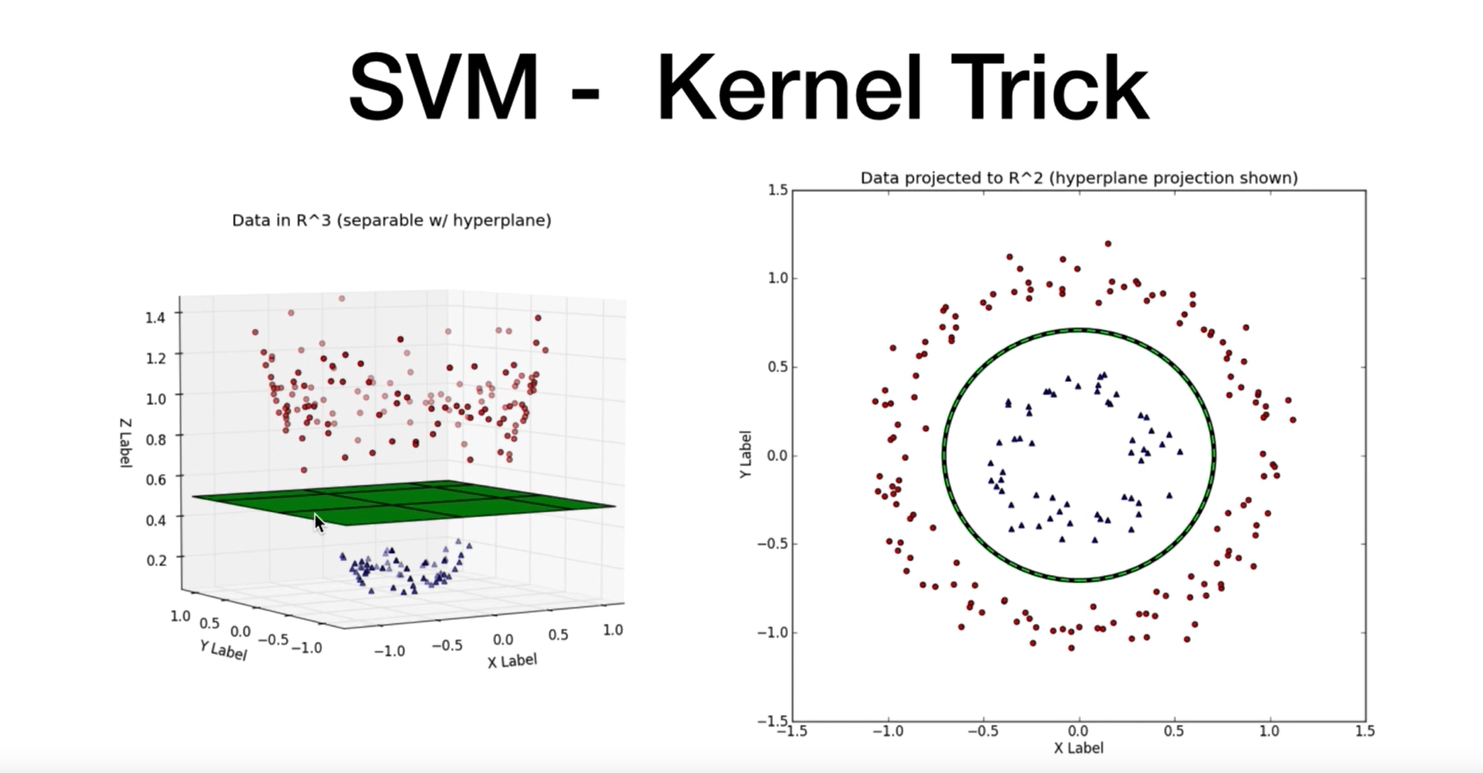
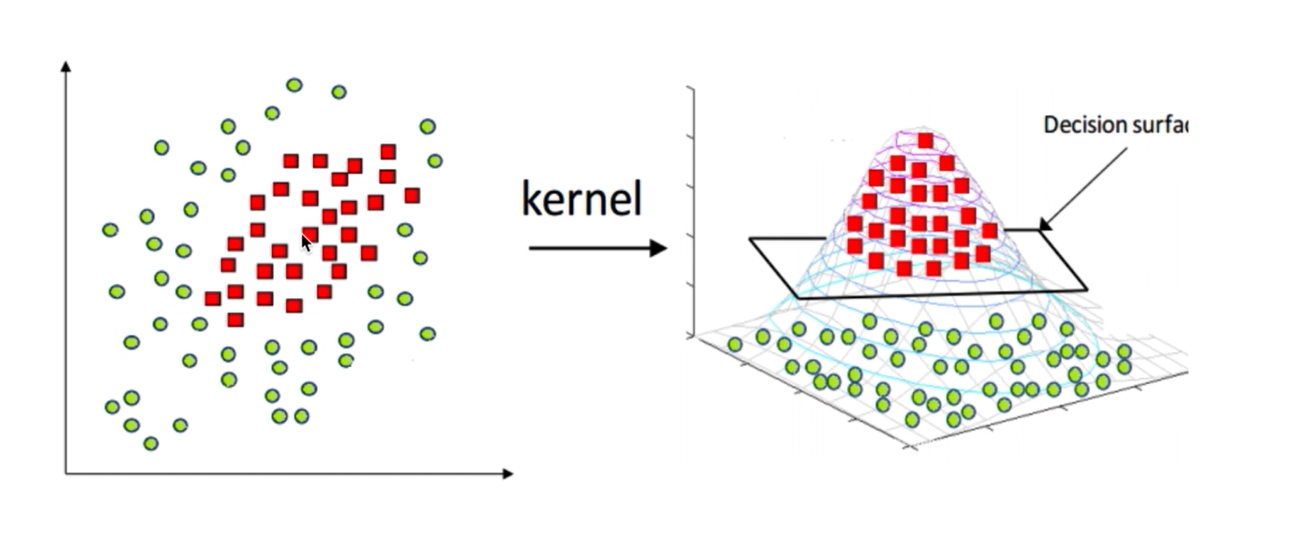
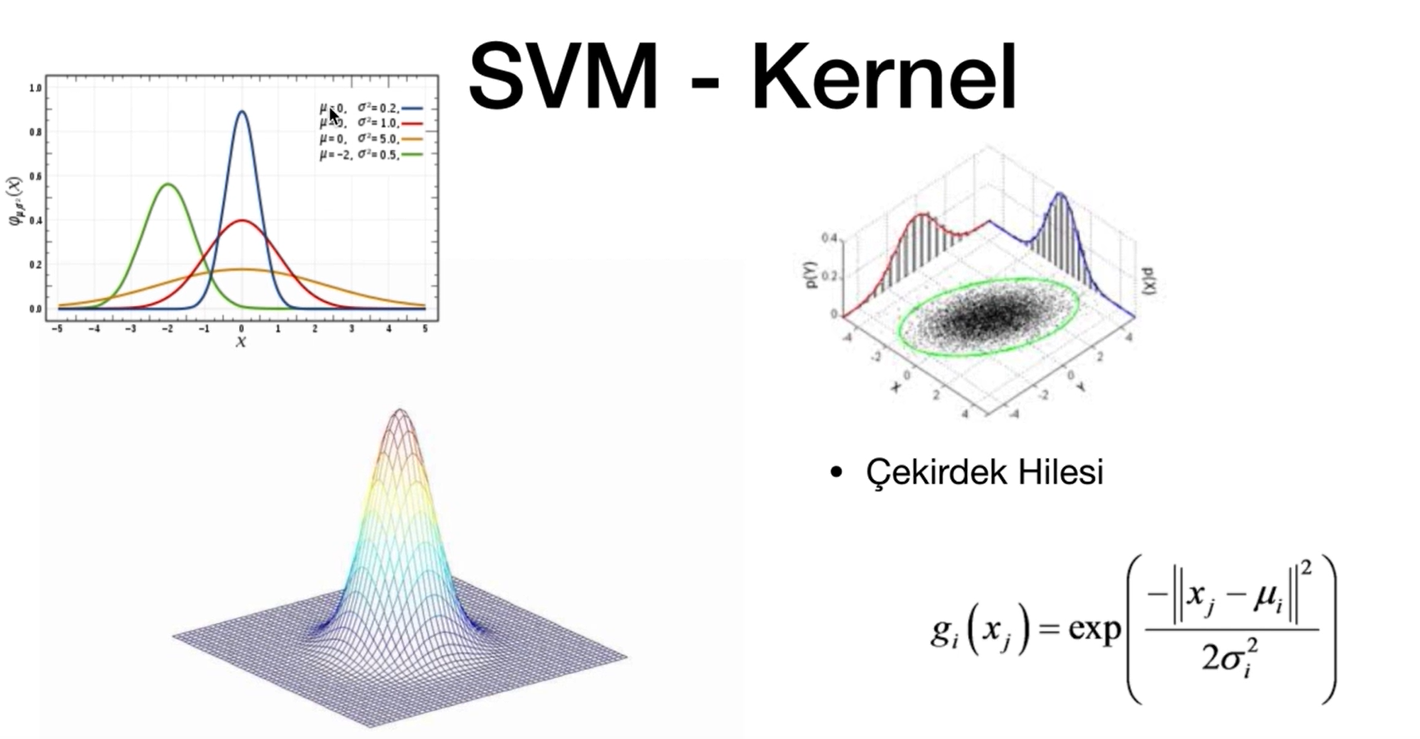

In [114]:
data = pd.read_pickle("veriler.pkl")

# Kategorik olmayan sütunları float32 olarak dönüştürme
categorical_columns = data.select_dtypes(exclude='object').columns.to_list()
data[categorical_columns] = data[categorical_columns].astype('float32')

# 'cinsiyet' sütununu 1 ve 0'a dönüştürme
data['cinsiyet'] = data['cinsiyet'].apply(lambda x: 1 if x == 'e' else 0)

# Özellikler ve hedef değişkenleri ayırma
x = data.iloc[:, 1:4].values
y = data.iloc[:, 4:].values

# Veriyi eğitim ve test kümelerine ayırma
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=0)

# Özellikleri normalize etme
columns_to_normalize = ['boy', 'kilo', 'yas']
df = data[columns_to_normalize]
data[columns_to_normalize] = MinMaxScaler().fit_transform(df)

In [115]:
data

,ulke,boy,kilo,yas,cinsiyet
0,tr,0.073529,0.000000,0.021739,1
1,tr,0.000000,0.080000,0.043478,1
2,tr,0.147059,0.053333,0.021739,0
3,tr,0.117647,0.000000,0.000000,0
4,tr,0.058824,0.106667,0.065217,1
5,tr,0.808823,0.800000,0.456522,1
6,tr,0.955882,0.666667,0.347826,1
7,tr,0.735294,0.800000,0.565217,1
8,tr,0.764706,0.400000,0.282609,0
9,us,0.882353,1.000000,0.521739,1


In [116]:
class support_vector_machine:
    def __init__(self,C=10,features=3,sigma_sq=0.1,kernel="rbf"):
        self.C=C
        self.features=features
        self.sigma_sq=sigma_sq
        self.kernel=kernel
        self.weights=np.zeros(features)
        self.bias=0.
        
    def __similarity(self,x,l):
        return np.exp(-sum((x-l)**2)/(2*self.sigma_sq))

    def gaussian_kernel(self,x1,x):
        m=x.shape[0]
        n=x1.shape[0]
        op=[[self.__similarity(x1[x_index],x[l_index]) for l_index in range(m)] for x_index in range(n)]
        return np.array(op)

    def loss_function(self,y,y_hat):
        sum_terms=1-y*y_hat
        sum_terms=np.where(sum_terms<0,0,sum_terms)
        return (self.C*np.sum(sum_terms)/len(y)+sum(self.weights**2)/2)

    def fit(self, X_train, y_train, epochs=1000, print_every_nth_epoch=100, learning_rate=0.01):
        y = y_train.reshape(-1)  # Düzgün bir şekilde yeniden şekillendiriyoruz
        x = X_train.copy()
        self.initial = x.copy()

        assert x.shape[0] == y.shape[0], "Samples of x and y don't match."
        assert x.shape[1] == self.features, "Number of Features don't match"

        if self.kernel == "gaussian":
            x = self.gaussian_kernel(x, x)
            m = x.shape[0]
            self.weights = np.zeros(m)

        n = x.shape[0]

        for epoch in range(epochs):
            y_hat = np.dot(x, self.weights) + self.bias
            grad_weights = (-self.C * (y * x.T).T + self.weights)  # Corrected this line

            for weight in range(self.weights.shape[0]):
                grad_weights[weight] = np.where(1 - y_hat <= 0, self.weights, grad_weights[weight])

            grad_weights = np.sum(grad_weights, axis=1)
            self.weights -= learning_rate * grad_weights / n
            grad_bias = -y * self.bias
            grad_bias = np.where(1 - y_hat <= 0, 0, grad_bias)
            grad_bias = sum(grad_bias)
            self.bias -= grad_bias * learning_rate / n
            if (epoch + 1) % print_every_nth_epoch == 0:
                print("--------------- Epoch {} --> Loss = {} ---------------".format(epoch + 1, self.loss_function(y, y_hat)))

        pred = self.predict(x)
        pred = np.where(pred == -1, 0, 1)
        diff = np.abs(np.where(y == -1, 0, 1) - pred)
        return ((len(diff) - sum(diff)) / len(diff)) * 100

    def predict(self,x):
        if(self.kernel=="gaussian"):
            x=self.gaussian_kernel(x,self.initial)
        return np.where(np.dot(x,self.weights)+self.bias>0,1,-1)
        

In [117]:
def visualize(model,title):
    print("Test Accuracy = {}".format(model.evaluate(X_test,y_test)))
    x1=np.arange(-5,6,0.3)
    x2=np.arange(-5,4,0.3)
    for i in range(len(x1)):
        for j in range(len(x2)):
            pred=model.predict(np.array([np.array(np.array([x1[i],x2[j]]))]))[0]
            if(pred>0.5):
                plt.scatter(x1[i],x2[j],c="r")
            else:
                plt.scatter(x1[i],x2[j],c="b")
    plt.title(title)
    plt.show()

In [118]:
model = support_vector_machine(features=3)
model.fit(X_train, y_train, epochs=20, print_every_nth_epoch=5, learning_rate=0.05)
print("Training Accuracy = {}".format(model.evaluate(X_train, y_train)))

ValueError: operands could not be broadcast together with shapes (14,) (3,) (3,) 

In [119]:
x.shape, y.shape

((22, 3), (22, 1))

### kendi verimizde, veri yetersizliğine bağlı problemler çıktı. random veri üretilip bir model çıkartsak şekil olarak nasıl göründüğünü inceleyelim en azından

<Axes: >

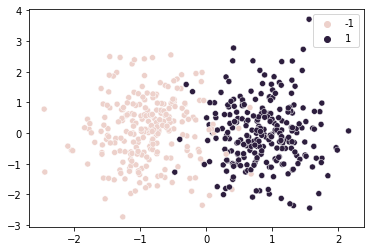

In [120]:
x, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1, random_state=14)
x = preprocessing.scale(x)

x_test = x[:500]
y_test = y[:500]
x = x[500:]
y = y[500:]

y = np.where(y == 0, -1, 1)
y_test = np.where(y_test == 0, -1, 1)

sns.scatterplot(x=x[:, 0], y=x[:, 1], hue=y)

<Axes: >

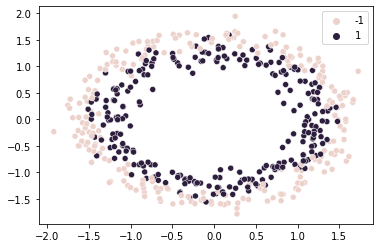

In [121]:
x, y = make_circles(n_samples=1000, noise=0.09)
x = preprocessing.scale(x)

x_test = x[:500]
y_test = y[:500]
x = x[500:]
y = y[500:]

y = np.where(y == 0, -1, 1)
y_test = np.where(y_test == 0, -1, 1)

sns.scatterplot(x=x[:, 0], y=x[:, 1], hue=y)

In [124]:
class support_vector_machine:
    def __init__(self,C=10,features=2,sigma_sq=0.1,kernel="None"):
        self.C=C
        self.features=features
        self.sigma_sq=sigma_sq
        self.kernel=kernel
        self.weights=np.zeros(features)
        self.bias=0.
        
    def __similarity(self,x,l):
        return np.exp(-sum((x-l)**2)/(2*self.sigma_sq))

    def gaussian_kernel(self,x1,x):
        m=x.shape[0]
        n=x1.shape[0]
        op=[[self.__similarity(x1[x_index],x[l_index]) for l_index in range(m)] for x_index in range(n)]
        return np.array(op)

    def loss_function(self,y,y_hat):
        sum_terms=1-y*y_hat
        sum_terms=np.where(sum_terms<0,0,sum_terms)
        return (self.C*np.sum(sum_terms)/len(y)+sum(self.weights**2)/2)

    def fit(self,x_train,y_train,epochs=1000,print_every_nth_epoch=100,learning_rate=0.01):
        y=y_train.copy()
        x=x_train.copy()
        self.initial=x.copy()
        
        assert x.shape[0]==y.shape[0] , "Samples of x and y don't match."
        assert x.shape[1]==self.features , "Number of Features don't match"
        
        if(self.kernel=="gaussian"):
            x=self.gaussian_kernel(x,x)
            m=x.shape[0]
            self.weights=np.zeros(m)

        n=x.shape[0]
        
        for epoch in range(epochs):
            y_hat=np.dot(x,self.weights)+self.bias
            grad_weights=(-self.C*np.multiply(y,x.T).T+self.weights).T
            
            for weight in range(self.weights.shape[0]):
                grad_weights[weight]=np.where(1-y_hat<=0,self.weights[weight],grad_weights[weight])
            
            grad_weights=np.sum(grad_weights,axis=1)
            self.weights-=learning_rate*grad_weights/n
            grad_bias=-y*self.bias
            grad_bias=np.where(1-y_hat<=0,0,grad_bias)
            grad_bias=sum(grad_bias)
            self.bias-=grad_bias*learning_rate/n
            if((epoch+1)%print_every_nth_epoch==0):
                print("--------------- Epoch {} --> Loss = {} ---------------".format(epoch+1, self.loss_function(y,y_hat)))
    
    def evaluate(self,x,y):
        pred=self.predict(x)
        pred=np.where(pred==-1,0,1)
        diff=np.abs(np.where(y==-1,0,1)-pred)
        return((len(diff)-sum(diff))/len(diff))

    def predict(self,x):
        if(self.kernel=="gaussian"):
            x=self.gaussian_kernel(x,self.initial)
        return np.where(np.dot(x,self.weights)+self.bias>0,1,-1)

In [129]:
def visualize(model,title):
    print("Test Accuracy = {}".format(model.evaluate(x_test,y_test)))
    x1=np.arange(-5,6,0.3)
    x2=np.arange(-5,4,0.3)
    for i in range(len(x1)):
        for j in range(len(x2)):
            pred=model.predict(np.array([np.array(np.array([x1[i],x2[j]]))]))[0]
            if(pred>0.5):
                plt.scatter(x1[i],x2[j],c="r")
            else:
                plt.scatter(x1[i],x2[j],c="b")
    plt.title(title)
    plt.show()

In [130]:
model=support_vector_machine(C=10,kernel="gaussian",sigma_sq=0.01)
model.fit(x,y,epochs=20,print_every_nth_epoch=2,learning_rate=0.01)
print("Training Accuracy = {}".format(model.evaluate(x,y)))

--------------- Epoch 2 --> Loss = 9.971265199418237 ---------------
--------------- Epoch 4 --> Loss = 9.915206606711031 ---------------
--------------- Epoch 6 --> Loss = 9.861345681898133 ---------------
--------------- Epoch 8 --> Loss = 9.809596052256028 ---------------
--------------- Epoch 10 --> Loss = 9.759874744030336 ---------------
--------------- Epoch 12 --> Loss = 9.712102048591655 ---------------
--------------- Epoch 14 --> Loss = 9.666201393863595 ---------------
--------------- Epoch 16 --> Loss = 9.622099220815363 ---------------
--------------- Epoch 18 --> Loss = 9.579724864819307 ---------------
--------------- Epoch 20 --> Loss = 9.539010441681798 ---------------
Training Accuracy = 0.872


Test Accuracy = 0.824


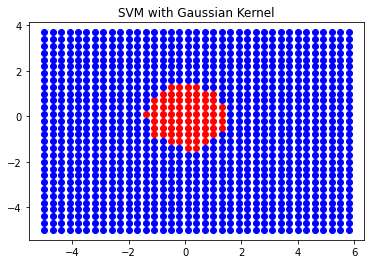

In [131]:
visualize(model,"SVM with Gaussian Kernel")